In [ ]:


# read excel file
df = pd.read_excel('C1Data.xlsx', sheet_name=None)

bonds = df['Bonds']
yield_curve = df['YieldCurve']

In [ ]:
import pandas as pd
import numpy as np


# change columns to datetime
# import datetime package

import datetime

# read excel file
df = pd.read_excel('C1Data.xlsx', sheet_name=None)

bonds = df['Bonds']
yield_curve = df['YieldCurve']


bonds['OFFERING_DATE'] = pd.to_datetime(bonds['OFFERING_DATE'])
bonds['MATURITY'] = pd.to_datetime(bonds['MATURITY'])
bonds['TRD_EXCTN_DT'] = pd.to_datetime(bonds['TRD_EXCTN_DT'])

#find the ones wehre the trade date is after the maturity date
bonds = bonds[bonds['TRD_EXCTN_DT'] < bonds['MATURITY']].copy()

# get rid of the row where the principal amount is 1
bonds = bonds[~(bonds['PRINCIPAL_AMT'] == 1)].copy()


In [49]:
import regex as re

# drop na yield_curve
yield_curve = yield_curve.dropna()

yield_curve.head()

# change the column names
yield_curve.columns = ['Date', '2024_data', '2025_data']

# make regex that only gets numbers and apply to the Date column
yield_curve['Date'] = yield_curve['Date'].apply(lambda x: re.findall(r'\d+', x)[0]).copy()

# change date column to numeric
yield_curve['Date'] = pd.to_numeric(yield_curve['Date'])/100

yield_curve.head()



/var/folders/q7/dvzw6sn17079c5z05_t3tqpc0000gn/T/ipykernel_71094/4153518464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_curve['Date'] = yield_curve['Date'].apply(lambda x: re.findall(r'\d+', x)[0]).copy()
/var/folders/q7/dvzw6sn17079c5z05_t3tqpc0000gn/T/ipykernel_71094/4153518464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_curve['Date'] = pd.to_numeric(yield_curve['Date'])/100


,Date,2024_data,2025_data
0,0.25,0.047468,0.03147
1,0.50,0.046900,0.031224
2,0.75,0.045734,0.030977
3,1.00,0.044603,0.030813
4,1.25,0.043789,0.031161


In [54]:
# save all columns as numeric

yield_curve['2024_data'] = pd.to_numeric(yield_curve['2024_data'])
yield_curve['2025_data'] = pd.to_numeric(yield_curve['2025_data'])

yield_curve.describe()

/var/folders/q7/dvzw6sn17079c5z05_t3tqpc0000gn/T/ipykernel_71094/4272436112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_curve['2024_data'] = pd.to_numeric(yield_curve['2024_data'])
/var/folders/q7/dvzw6sn17079c5z05_t3tqpc0000gn/T/ipykernel_71094/4272436112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_curve['2025_data'] = pd.to_numeric(yield_curve['2025_data'])


,Date,2024_data,2025_data
count,120.000000,120.000000,120.000000
mean,15.125000,0.036096,0.034557
std,8.696264,0.002422,0.001626
min,0.250000,0.034280,0.030794
25%,7.687500,0.034997,0.034172
50%,15.125000,0.035486,0.035482
75%,22.562500,0.035979,0.035562
max,30.000000,0.047468,0.035646


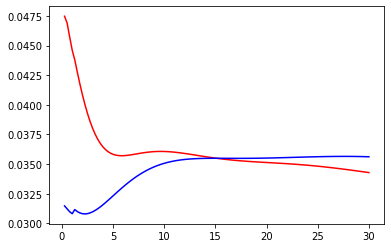

In [ ]:
# plot the yield curve
import matplotlib.pyplot as plt

plt.plot(yield_curve['Date'], yield_curve['2024_data'], label='2024', color='red')
plt.plot(yield_curve['Date'], yield_curve['2025_data'], label='2025', color='blue')